# Classify MRI

# 1.0 - Load data and known labels

In [186]:
import numpy as np
import cv2
import os

<!-- + connect drive  -->

In [187]:
# from google.colab import drive
# drive.mount('/content/drive')

In [188]:
train_dir = r'dataset_classification_mri\train'
test_dir = r'dataset_classification_mri\test'

### Load training images

In [189]:
train_images = []
train_labels = []

# Load 0 to 9 test images
for label in range(2):
    folder_path = os.path.join(train_dir, str(label)) # 0 1 as str join path
    file_names = os.listdir(folder_path) # list from numberic folders

    for file_name in file_names: # loop on each image in folder
        image_path = os.path.join(folder_path, file_name) # join image with path folder to get path image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        train_images.append(image)
        train_labels.append(label)

In [191]:
print("Train Labels:", np.unique(train_labels))

Train Labels: [0 1]


### Load test images

In [192]:
test_images = []
test_labels = []

for label in range(2):
    folder_path = os.path.join(test_dir, str(label))
    file_names = os.listdir(folder_path)

    for file_name in file_names:
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        test_images.append(image)
        test_labels.append(label)

In [194]:
print("Test Labels:", np.unique(test_labels))

Test Labels: [0 1]


Convert testing lists to NumPy arrays

In [195]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Reshaping with depth 1 and normalizing 0 to 1

In [196]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) 
test_images = test_images / 255.0

# 2.0 - Data Preprocessing

Convert training lists to NumPy arrays

In [197]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Plot

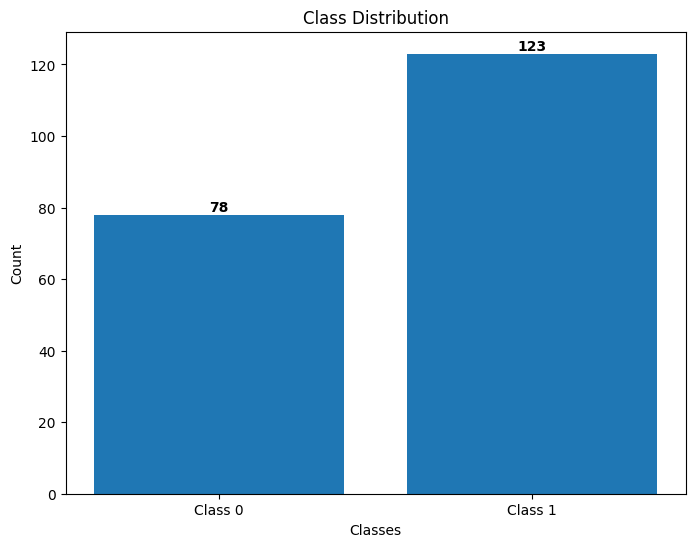

In [198]:
class_counts = np.bincount(train_labels)
class_names = ['Class 0', 'Class 1']

plt.figure(figsize=(8, 6))
plt.bar(np.unique(train_labels), class_counts)
plt.xticks(np.unique(train_labels), class_names)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')

# Add annotations with the number of data in each class
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()

Reshaping with depth 1 and normalizing 0 to 1

In [199]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
train_images = train_images / 255.0

In [200]:
print("Shape train:", train_images.shape)

Shape train: (201, 28, 28, 1)


Apply Data Augmentation

In [201]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

Create an ImageDataGenerator with data augmentation settings

In [202]:
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

Fit the ImageDataGenerator to your training data

In [203]:
# datagen.fit(train_images)

# 3.0 - Train deep learning model

### 3.1 - Build Model

In [204]:
#  define a linear stack of layers (structure)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# to introduce regularization and prevent overfitting.
from tensorflow.keras.layers import Dropout

from tensorflow.keras.optimizers import Adam # 87%
# from tensorflow.keras.optimizers import SGD # 77%

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [205]:
''' Define the model architecture consists of
    - Convolutional layer
    - Max pooling layer
    - Flatten layer
    - Fully connected layer
'''

model = Sequential()

# uses 32 filters of size 3x3 and employs the ReLU activation function= max( 0 , x )
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# taking the maximum value within each region 
# reduce the dimensions 
model.add(MaxPooling2D(pool_size=(2, 2)))

# convert dimensions to 1D vector
model.add(Flatten())

# 128 neurons with the ReLU activation function
model.add(Dense(128, activation='relu'))

# output
# 2 neurons with the softmax activation function= exp(xi) / sum(exp(xj))
# 2 possible output classes 
model.add(Dense(2, activation='softmax')) 

# prevent overfitting.
model.add(Dropout(0.5))

            # adjusts the learning rate dynamically for each weight.
model.compile(optimizer= Adam(learning_rate=0.001), # Adaptive Moment Estimation
              loss=SparseCategoricalCrossentropy(), # minimize the difference between the predicted probabilities and the true labels to improve the accuracy
              metrics= [SparseCategoricalAccuracy()] # to evaluate the performance of the model during training and testing
              )

### 3.2 - Train Model

In [206]:
# from keras.utils import to_categorical

# # # Convert target labels to one-hot encoded format
# train_labels = to_categorical(train_labels, num_classes=2)
# test_labels = to_categorical(test_labels, num_classes=2)

In [207]:
model.fit(train_images, train_labels,
          validation_data=(test_images, test_labels),
          epochs=60, 
          batch_size= 32
        #   verbose=1,
          )

Epoch 1/60


7/7 [==============================] - 3s 105ms/step - loss: 3.6156 - sparse_categorical_accuracy: 0.4876 - val_loss: 4.9576 - val_sparse_categorical_accuracy: 0.6154
Epoch 2/60
7/7 [==============================] - 0s 35ms/step - loss: 3.7808 - sparse_categorical_accuracy: 0.4677 - val_loss: 5.9928 - val_sparse_categorical_accuracy: 0.6154
Epoch 3/60
7/7 [==============================] - 0s 35ms/step - loss: 3.3141 - sparse_categorical_accuracy: 0.4776 - val_loss: 5.4976 - val_sparse_categorical_accuracy: 0.6154
Epoch 4/60
7/7 [==============================] - 0s 33ms/step - loss: 3.4362 - sparse_categorical_accuracy: 0.4478 - val_loss: 3.2188 - val_sparse_categorical_accuracy: 0.6154
Epoch 5/60
7/7 [==============================] - 0s 41ms/step - loss: 3.6990 - sparse_categorical_accuracy: 0.4776 - val_loss: 2.2530 - val_sparse_categorical_accuracy: 0.6154
Epoch 6/60
7/7 [==============================] - 0s 42ms/step - loss: 3.2355 - sparse_categorical_accuracy: 0.4876 - val_los

if use data agumentation, run this cell

In [208]:
# model.fit(datagen.flow(train_images, train_labels, batch_size= 32),
#           validation_data=(test_images, test_labels),
#           epochs=60,      # how many times the model will iterate on dataset during training.
#           verbose=1,
#           )

# 4.0 - Model Evaluation

In [209]:
test_loss, test_accuracy = model.evaluate(test_images, 
                                          test_labels, 
                                          verbose=2) # no progress information should be displayed during evaluation

# average loss value of the model on the test data,
print("Test Loss:", test_loss)
# proportion of correctly predicted labels to the total number of samples
print(f"Test Accuracy: {round(test_accuracy*100)}%")

2/2 - 0s - loss: 1.9031 - sparse_categorical_accuracy: 0.8654 - 68ms/epoch - 34ms/step
Test Loss: 1.9030985832214355
Test Accuracy: 87%


> make predictions on test data using the trained model

In [210]:
# get predicted labels for the test images as 
predictions = model.predict(test_images)

# Convert predictions to categorical labels
# stores the predicted labels for test images,
predicted_labels = np.argmax(predictions, axis=1) # 1 are labels 

# Convert test_labels from one-hot encoded format to categorical labels
# stores the true labels for test images,
# true_labels = np.argmax(test_labels, axis=1)

2/2 [==============================] - 0s 11ms/step


> Confusion matrix Table that shows the

  + true positive - true negative
  
  + false positive - false negative

In [211]:
from sklearn.metrics import confusion_matrix

In [212]:
cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[14  6]
 [ 1 31]]


# 5.0 - Visualization

In [213]:
from matplotlib import pyplot as plt
import seaborn as sns

**Plotting Confusion Matrix Heatmap**

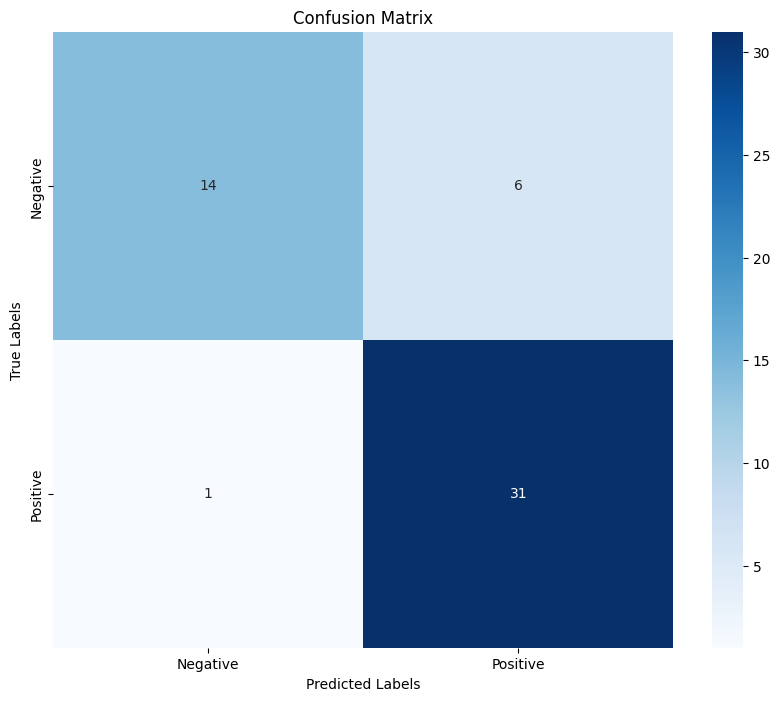

In [214]:
classes = ['Negative', 'Positive']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='Blues', 
            xticklabels=classes,
            yticklabels=classes)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 6.0 - Save the model

In [215]:
model.save( r'models/model_classification_mri.h5')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 7.0 - Load the model

In [216]:
from tensorflow.keras.models import load_model
loaded_model = load_model( r'models/model_classification_mri.h5')

In [217]:
loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               692352    
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
 dropout_5 (Dropout)         (None, 2)                 0         
                                                      

# 8.0 - Deployment

In [218]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image

In [219]:
def predict_result(image_path):
    # Preprocess the image
    img = Image.open(image_path)
    grayscale_image = img.convert('L')  # Convert to grayscale
    resized_image = grayscale_image.resize((28, 28))
    normalized_image = np.array(resized_image) / 255.0
    reshaped_image = normalized_image.reshape((1, 28, 28, 1))

    # Use the loaded model for prediction
    probabilities = loaded_model.predict(reshaped_image)
    predicted_label = np.argmax(probabilities)

    # Convert the predicted label to the corresponding class
    if predicted_label == 0:
        result = 'Negative'
    else:
        result = 'Positive'
    
    return result, probabilities

Load the testing images

1/1 [==============================] - 0s 179ms/step


Image: 1
Predicted Result: Negative
Probabilities Result: [[0.9240288  0.07597116]]

1/1 [==============================] - 0s 55ms/step
Image: 2
Predicted Result: Negative
Probabilities Result: [[0.9595238 0.0404762]]

1/1 [==============================] - 0s 42ms/step
Image: 3
Predicted Result: Positive
Probabilities Result: [[5.049762e-04 9.994950e-01]]

1/1 [==============================] - 0s 58ms/step
Image: 4
Predicted Result: Positive
Probabilities Result: [[2.8168748e-10 1.0000000e+00]]

1/1 [==============================] - 0s 49ms/step
Image: 5
Predicted Result: Positive
Probabilities Result: [[0.36485288 0.63514715]]



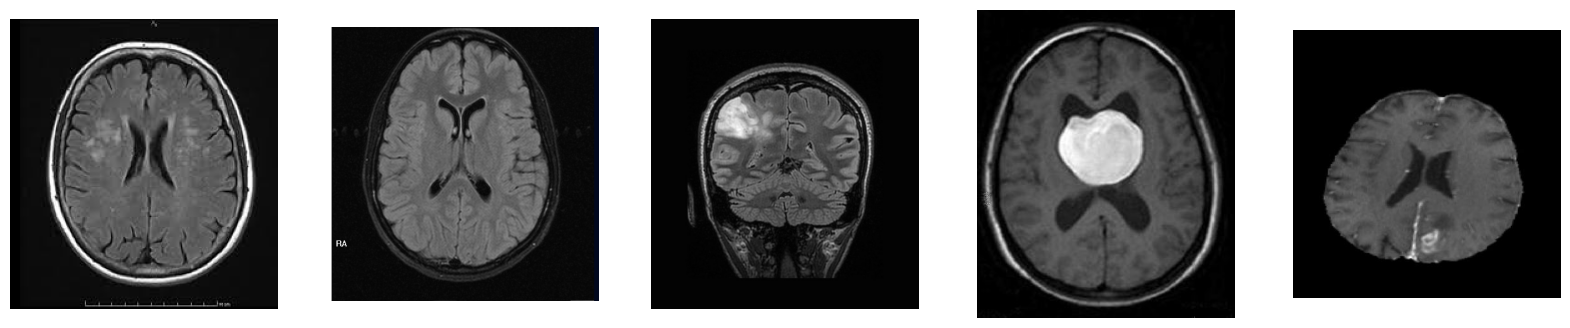

In [220]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
image_paths = glob.glob("testing/*.jpg")[:5]

for i, img_path in enumerate(image_paths):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis("off")

    result, probabilities = predict_result(img_path)
    print("Image:", i+1)
    print("Predicted Result:", result)
    print("Probabilities Result:", probabilities)
    print()

plt.show()